In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
#Electric Vehicle Charging Station Locations dataset from data.gov
#Downloaded on March 26, 2023
ev_chargers = pd.read_csv('alt_fuel_stations (Mar 26 2023).csv')

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_53053/3945072342.py:3: DtypeWarning: Columns (6,16,20,31,33,43,46,49,52,57,58,60,62,65,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_chargers = pd.read_csv('alt_fuel_stations (Mar 26 2023).csv')


In [5]:
#Number of rows and columns in df
ev_chargers.shape

(59147, 70)

In [253]:
ev_chargers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59147 entries, 0 to 59146
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    59147 non-null  object 
 1   Station Name                      59146 non-null  object 
 2   Street Address                    59147 non-null  object 
 3   Intersection Directions           3397 non-null   object 
 4   City                              59147 non-null  object 
 5   State                             59137 non-null  object 
 6   ZIP                               59147 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     58531 non-null  object 
 9   Status Code                       59147 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           59147 non-null  object 
 12  Acce

In [254]:
ev_chargers.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name
0,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3181,E,...,3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,"From Route 1, take the first exit after Callah...",East Boston,MA,2128,NaN,866-809-4869,E,...,3000 3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,CNG,Clean Energy - Everett - National Grid,16 Rover St,"Rt 16, exit to Rt 99, to Dexter St to Rover. O...",Everett,MA,2149,NaN,866-809-4869,E,...,3000 3600,HD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervo...",Brooklyn,NY,11211,NaN,866-809-4869,E,...,3000 3600,HD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left on...",Brooklyn,NY,11236,NaN,866-809-4869,E,...,3000 3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [255]:
ev_chargers = ev_chargers[[
    'City', 'State', 'Latitude', 'Longitude'
]]

In [256]:
#Amount of charging stations in each state
state_counts = ev_chargers['State'].value_counts()
print(state_counts)

CA    15356
NY     3370
FL     2984
TX     2914
MA     2417
CO     1825
WA     1666
GA     1636
IL     1635
PA     1538
OH     1475
MI     1398
MD     1359
MN     1309
NC     1229
VA     1216
MO     1189
AZ     1043
OR     1041
NJ      957
IA      943
UT      810
WI      792
TN      766
IN      681
CT      549
KS      549
OK      541
NV      505
SC      483
ME      409
NE      378
AR      368
HI      363
VT      340
KY      327
AL      313
NM      300
RI      298
DC      249
LA      236
NH      187
SD      163
WV      158
DE      155
ID      144
ND      133
MS      124
MT      116
WY      101
AK       61
PR       29
ON        8
QC        1
Name: State, dtype: int64


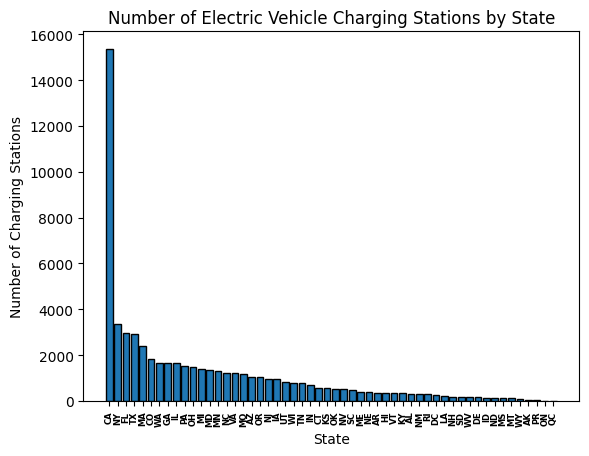

In [257]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a bar chart of the state counts
ax.bar(state_counts.index, state_counts.values, edgecolor='black')

# set the title and axis labels
ax.set_title('Number of Electric Vehicle Charging Stations by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Charging Stations')

# rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize = 6, fontweight='bold')

# display the chart
plt.show()

In [258]:
import requests
from bs4 import BeautifulSoup

# Send an HTTP request to the URL
url = "https://www.fhwa.dot.gov/policyinformation/statistics/2021/mv1.cfm"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element on the webpage and extract the table rows
table = soup.find_all('table')[0]
rows = table.find_all('tr')

# Create an empty list to store the table data
data = []

# Loop through each row in the table and extract the text from the cells
for row in rows:
    cells = row.find_all('td')
    if cells:
        row_data = []
        for cell in cells:
            row_data.append(cell.get_text().strip())
        data.append(row_data)
        
# Add state names to the dataframe
state_names = [row.find_all('th')[0].get_text().strip() for row in table.find_all('tr')[1:]]

# Convert the list of data to a pandas dataframe
vehicle_count_df = pd.DataFrame(data)

vehicle_count_df.columns = ['Private and Commercial', 'Publicly Owned', "Total Automobiles", "PRIVATE AND COMMERCIAL",
              "PUBLICLY OWNED 2","TOTAL","PRIVATE AND COMMERCIAL 2", "PUBLICLY OWNED 3", "TOTAL 3",
              "PRIVATE AND COMMERCIAL 3", "PUBLICLY OWNED 3", "TOTAL 4", "PRIVATE AND COMMERCIAL 4",
              "PUBLICLY OWNED 5", "TOTAL 5"]
# Print the dataframe
print(vehicle_count_df.head())


  Private and Commercial Publicly Owned Total Automobiles  \
0              2,057,940          1,199         2,059,139   
1                138,729          2,364           141,093   
2              2,225,380         33,108         2,258,488   
3                940,535         18,104           958,639   
4             14,027,931        240,597        14,268,528   

  PRIVATE AND COMMERCIAL PUBLICLY OWNED 2   TOTAL PRIVATE AND COMMERCIAL 2  \
0                  3,222              136   3,358                3,271,678   
1                  7,257              578   7,835                  501,147   
2                  4,540           16,816  21,356                3,446,021   
3                 10,499              835  11,334                2,105,469   
4                 27,912           66,977  94,889               15,859,736   

  PUBLICLY OWNED 3     TOTAL 3 PRIVATE AND COMMERCIAL 3 PUBLICLY OWNED 3  \
0            6,495   3,278,173                  123,296                -   
1           

In [259]:
vehicle_count_df.drop(vehicle_count_df.index[-1], inplace=True)

In [260]:
# Add state names to the dataframe
state_names = [row.find_all('th')[0].get_text().strip() for row in table.find_all('tr')[1:]]

state_names.pop(0)
state_names.pop(-1)

vehicle_count_df['State'] = state_names
print(state_names)

['Alabama (2)', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut (2)', 'Delaware', 'Dist. of Col.', 'Florida', 'Georgia (5)', 'Hawaii', 'Idaho (3)', 'Illinois', 'Indiana (4)', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana (3)', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri (2)', 'Montana', 'Nebraska', 'Nevada (2)', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York (3)', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [261]:
vehicle_count_df = vehicle_count_df[['Total Automobiles', 'State']]

In [262]:
vehicle_count_df.head()

,Total Automobiles,State
0,"2,059,139",Alabama (2)
1,"141,093",Alaska
2,"2,258,488",Arizona
3,"958,639",Arkansas
4,"14,268,528",California


In [263]:
vehicle_count_df['Total Automobiles'] = vehicle_count_df['Total Automobiles'].str.replace(',', '').astype(int)

In [289]:
import re
# Function to remove parentheses and their contents from a string
def remove_parentheses(string):
    return re.sub(r'\([^)]*\)', '', string).strip()

# Add state names to the dataframe
state_names = [row.find_all('th')[0].get_text().strip() for row in table.find_all('tr')[1:]]
state_names.pop(0)
state_names.pop(-1)
state_names = [remove_parentheses(state) for state in state_names]  # Remove parentheses

vehicle_count_df['State'] = state_names

In [290]:
vehicle_count_df.State

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8      Dist. of Col.
9            Florida
10           Georgia
11            Hawaii
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
19             Maine
20          Maryland
21     Massachusetts
22          Michigan
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
29     New Hampshire
30        New Jersey
31        New Mexico
32          New York
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
37            Oregon
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
42         Tennessee
43             Texas
44              Utah
45           Vermont
46          Virginia
47        Was

In [266]:
state_ev_counts = pd.read_excel(r'/Users/brockada/Downloads/10962-ev-registration-counts-by-state_6-30-22 (1).xlsx')

In [267]:
state_ev_counts.drop(state_ev_counts.index[[-1, 0, 1]], inplace=True)

In [292]:
state_ev_counts.tail()

,State,Total
46,Virginia,30660
47,Washington,66810
48,West Virginia,1010
49,Wisconsin,9330
50,Wyoming,510


In [269]:
state_ev_counts.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,NaN,Alabama,4750,NaN,NaN
3,NaN,Alaska,1290,NaN,NaN
4,NaN,Arizona,40740,NaN,NaN
5,NaN,Arkansas,2390,NaN,NaN
6,NaN,California,563070,NaN,NaN


In [270]:
state_ev_counts.drop('Unnamed: 0', axis=1, inplace=True)
state_ev_counts.drop('Unnamed: 3', axis=1, inplace=True)
state_ev_counts.drop('Unnamed: 4', axis=1, inplace=True)

In [300]:
state_ev_counts.reset_index(drop=True, inplace=True)
state_ev_counts.rename(columns={'Unnamed: 1': 'State', 'Unnamed: 2': 'Total'}, inplace=True)
state_ev_counts.rename(columns={'Total': 'Total EVs'}, inplace=True)
state_ev_counts

,State,Total EVs
0,Alabama,4750
1,Alaska,1290
2,Arizona,40740
3,Arkansas,2390
4,California,563070
5,Colorado,37000
6,Connecticut,13350
7,Delaware,3010
8,District of Columbia,3700
9,Florida,95640


In [301]:
merged_df = pd.merge(state_ev_counts, vehicle_count_df, on='State')

In [302]:
state_ev_counts

,State,Total EVs
0,Alabama,4750
1,Alaska,1290
2,Arizona,40740
3,Arkansas,2390
4,California,563070
5,Colorado,37000
6,Connecticut,13350
7,Delaware,3010
8,District of Columbia,3700
9,Florida,95640


In [303]:
vehicle_count_df

,Total Automobiles,State
0,2059139,Alabama
1,141093,Alaska
2,2258488,Arizona
3,958639,Arkansas
4,14268528,California
5,1496310,Colorado
6,1119278,Connecticut
7,177980,Delaware
8,199249,District of Columbia
9,7853979,Florida


In [304]:
# replace the DC name in df1 with the same name as in df2
vehicle_count_df.loc[vehicle_count_df['State'] == 'Dist. of Col.', 'State'] = 'District of Columbia'

# merge the dataframes
merged_df = pd.merge(vehicle_count_df, state_ev_counts, on='State', how='outer')


In [305]:
merged_df.head()

,Total Automobiles,State,Total EVs
0,2059139,Alabama,4750
1,141093,Alaska,1290
2,2258488,Arizona,40740
3,958639,Arkansas,2390
4,14268528,California,563070


In [312]:
merged_df['EV Adoption Rate'] = (merged_df['Total EVs'] / merged_df['Total Automobiles']) * 100
merged_df['EV Adoption Rate'] = merged_df['EV Adoption Rate'].apply(lambda x: '{:.2f}%'.format(x))

In [314]:
merged_df = merged_df.set_index('State')

In [315]:
merged_df

,Total Automobiles,Total EVs,EV Adoption Rate
State,,,
Alabama,2059139,4750,0.23%
Alaska,141093,1290,0.91%
Arizona,2258488,40740,1.80%
Arkansas,958639,2390,0.25%
California,14268528,563070,3.95%
Colorado,1496310,37000,2.47%
Connecticut,1119278,13350,1.19%
Delaware,177980,3010,1.69%
District of Columbia,199249,3700,1.86%


In [320]:
# Load US states shapefile
us_states = gpd.read_file('shapefiles/states.shp')

# Merge with EV adoption rates dataframe
merged_df = us_states.merge(df, left_on='STATE_NAME', right_on='State')

# Plot choropleth map
fig, ax = plt.subplots(figsize=(15,10))
merged_df.plot(column='EV Adoption Rate', cmap='OrRd', legend=True, legend_kwds={'label': "EV Adoption Rate %"})
plt.title('Electric Vehicle Adoption Rate by State')
plt.axis('off')
plt.show()

DriverError: shapefiles/states.shp: No such file or directory